In [1]:
import pandas as pd

df = pd.read_csv("tech_jobs.csv")
df.head()

,clean_text,suspicious_score,is_vague,compensation,is_scam
0,copier technician east coast copier office equ...,0,0,Starting at $25/hour Negotiable with experience,0
1,matchmaking search assistant want high profile...,0,0,up to $16.50/hour,0
2,support technician electro mechanical scantech...,1,0,competitive,0
3,immediate hire hvac master license holder hvac...,1,0,Negotiable Competitive compensation,1
4,computer expert need help access information s...,0,1,Willing to pay solid money for a computer expe...,1


In [2]:
df.shape

(383, 5)

In [3]:
#Hold out method to split the data

from sklearn.model_selection import train_test_split

df.rename(columns={"clean_text": "requirement"}, inplace=True)
X = df['requirement']
Y = df['is_scam']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(383,) (306,) (77,)
(383,) (306,) (77,)


In [4]:
#vectorization


#feature attraction- transfer the text data into feature values

from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
#convert to int
#Y_train = Y_train.astype('int')
#Y_test = Y_test.astype('int')


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [5]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 27815 stored elements and shape (306, 5401)>
  Coords	Values
  (0, 2148)	0.06923771420546755
  (0, 186)	0.1646353357874256
  (0, 127)	0.1810694207653037
  (0, 2133)	0.11553964088518048
  (0, 229)	0.1810694207653037
  (0, 5030)	0.1587697569709967
  (0, 2135)	0.1080822087474918
  (0, 3557)	0.1646353357874256
  (0, 1835)	0.14951456027504853
  (0, 4063)	0.14951456027504853
  (0, 2332)	0.13647009317668973
  (0, 2131)	0.18647995418174704
  (0, 474)	0.17736570256135234
  (0, 3360)	0.12342562607833091
  (0, 2194)	0.09394707400209398
  (0, 2689)	0.1092111531561781
  (0, 4043)	0.1810694207653037
  (0, 4175)	0.10491523268643463
  (0, 3831)	0.1292912048947598
  (0, 2651)	0.0811418021644814
  (0, 3413)	0.06730683794132739
  (0, 1154)	0.1080822087474918
  (0, 1459)	0.1987730649825683
  (0, 2670)	0.15381048074479203
  (0, 904)	0.1810694207653037
  :	:
  (305, 3668)	0.04361634927384799
  (305, 2621)	0.04267673912493811
  (305, 2477)	0.05264

In [6]:
from sklearn.metrics import accuracy_score
#prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.8235294117647058


In [7]:
# NEW CODE THAT GAVE A HIGHER ACCURACY SCORE

from scipy.sparse import hstack

vectorizer = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=2,
    max_features=5000
)
X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

numeric_train = df.loc[X_train.index, ["suspicious_score", "is_vague"]].values
numeric_test = df.loc[X_test.index, ["suspicious_score", "is_vague"]].values

# Combine
X_train_with_features = hstack([X_train_text, numeric_train])
X_test_with_features = hstack([X_test_text, numeric_test])

model_with_features = LogisticRegression(class_weight='balanced', max_iter=1000)
model_with_features.fit(X_train_with_features, Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [8]:
print(X_train_with_features)

<COOrdinate sparse matrix of dtype 'float64'
	with 36182 stored elements and shape (306, 5002)>
  Coords	Values
  (0, 1924)	0.06002309338128579
  (0, 152)	0.142724557666689
  (0, 1911)	0.10016284814821007
  (0, 4681)	0.13763960954161067
  (0, 1917)	0.09369790125154111
  (0, 3356)	0.142724557666689
  (0, 1681)	0.12961615668910165
  (0, 3837)	0.12961615668910165
  (0, 2075)	0.11830773503280045
  (0, 1904)	0.1616619472787997
  (0, 348)	0.15376068158293874
  (0, 3071)	0.10699931337649927
  (0, 1977)	0.08144396533646621
  (0, 2378)	0.09467659814300358
  (0, 3930)	0.09095240767148123
  (0, 3649)	0.11208426150157763
  (0, 2318)	0.0703429052263525
  (0, 3138)	0.05834919112093298
  (0, 873)	0.09369790125154111
  (0, 1139)	0.17231900818861695
  (0, 2362)	0.133340347160624
  (0, 4029)	0.12339268315787882
  (0, 2396)	0.07534472363419338
  (0, 3378)	0.05862129083513427
  (0, 2064)	0.055764936386494435
  :	:
  (234, 5000)	5.0
  (238, 5000)	2.0
  (242, 5000)	1.0
  (243, 5000)	1.0
  (244, 5000)	4.0
  

In [9]:
from sklearn.metrics import accuracy_score

# Prediction on training data using model_with_features
prediction_on_training_data = model_with_features.predict(X_train_with_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print("Accuracy on training data (model with more features):", accuracy_on_training_data)

Accuracy on training data (model with more features): 0.9281045751633987



 Fold 1
Logistic → Accuracy: 0.857, Recall: 0.684, F1: 0.703, MSE: 0.143
Random Forest → Accuracy: 0.792, Recall: 0.263, F1: 0.385, MSE: 0.208
Decision Tree → Accuracy: 0.766, Recall: 0.632, F1: 0.571, MSE: 0.234

 Fold 2
Logistic → Accuracy: 0.792, Recall: 0.600, F1: 0.600, MSE: 0.208
Random Forest → Accuracy: 0.844, Recall: 0.450, F1: 0.600, MSE: 0.156
Decision Tree → Accuracy: 0.805, Recall: 0.650, F1: 0.634, MSE: 0.195

 Fold 3
Logistic → Accuracy: 0.883, Recall: 0.600, F1: 0.727, MSE: 0.117
Random Forest → Accuracy: 0.844, Recall: 0.400, F1: 0.571, MSE: 0.156
Decision Tree → Accuracy: 0.805, Recall: 0.600, F1: 0.615, MSE: 0.195

 Fold 4
Logistic → Accuracy: 0.882, Recall: 0.684, F1: 0.743, MSE: 0.118
Random Forest → Accuracy: 0.829, Recall: 0.316, F1: 0.480, MSE: 0.171
Decision Tree → Accuracy: 0.829, Recall: 0.579, F1: 0.629, MSE: 0.171

 Fold 5
Logistic → Accuracy: 0.882, Recall: 0.684, F1: 0.743, MSE: 0.118
Random Forest → Accuracy: 0.855, Recall: 0.474, F1: 0.621, MSE: 0.145


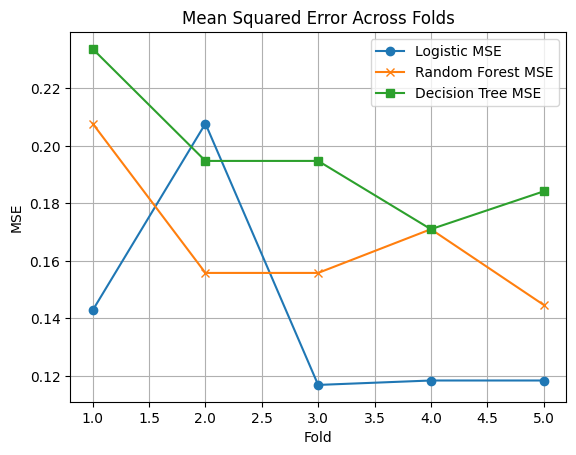

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X_text = df['requirement']
y = df['is_scam'].values
X_num = df[['suspicious_score', 'is_vague']].values

# TF-IDF setup
vectorizer2 = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=2,
    max_features=5000
)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics for Logistic
logistic_accuracies, logistic_recalls, logistic_f1s, logistic_mses = [], [], [], []

# Metrics for Random Forest
rf_accuracies, rf_recalls, rf_f1s, rf_mses = [], [], [], []

# Metrics for Decision Tree
dt_accuracies, dt_recalls, dt_f1s, dt_mses = [], [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_text, y)):
    print(f"\n Fold {fold + 1}")

    # TF-IDF
    X_train_text = vectorizer2.fit_transform(X_text.iloc[train_idx])
    X_test_text = vectorizer2.transform(X_text.iloc[test_idx])

    # Numerical
    X_train_num = X_num[train_idx]
    X_test_num = X_num[test_idx]

    # Combine
    X_train_comb = hstack([X_train_text, X_train_num])
    X_test_comb = hstack([X_test_text, X_test_num])
    y_train = y[train_idx]
    y_test = y[test_idx]

    # ------------------ Logistic Regression ------------------
    log_model = LogisticRegression(C=5.0, class_weight='balanced', max_iter=1000)
    log_model.fit(X_train_comb, y_train)
    y_pred_log = log_model.predict(X_test_comb)

    acc_log = accuracy_score(y_test, y_pred_log)
    rec_log = recall_score(y_test, y_pred_log)
    f1_log = f1_score(y_test, y_pred_log)
    mse_log = mean_squared_error(y_test, y_pred_log)

    logistic_accuracies.append(acc_log)
    logistic_recalls.append(rec_log)
    logistic_f1s.append(f1_log)
    logistic_mses.append(mse_log)

    print(f"Logistic → Accuracy: {acc_log:.3f}, Recall: {rec_log:.3f}, F1: {f1_log:.3f}, MSE: {mse_log:.3f}")

    # ------------------ Random Forest Classifier ------------------
    rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    rf_model.fit(X_train_comb, y_train)
    y_pred_rf = rf_model.predict(X_test_comb)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    rec_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)

    rf_accuracies.append(acc_rf)
    rf_recalls.append(rec_rf)
    rf_f1s.append(f1_rf)
    rf_mses.append(mse_rf)

    print(f"Random Forest → Accuracy: {acc_rf:.3f}, Recall: {rec_rf:.3f}, F1: {f1_rf:.3f}, MSE: {mse_rf:.3f}")

    # ------------------ Decision Tree ------------------
    dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
    dt_model.fit(X_train_comb, y_train)
    y_pred_dt = dt_model.predict(X_test_comb)

    acc_dt = accuracy_score(y_test, y_pred_dt)
    rec_dt = recall_score(y_test, y_pred_dt)
    f1_dt = f1_score(y_test, y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)

    dt_accuracies.append(acc_dt)
    dt_recalls.append(rec_dt)
    dt_f1s.append(f1_dt)
    dt_mses.append(mse_dt)

    print(f"Decision Tree → Accuracy: {acc_dt:.3f}, Recall: {rec_dt:.3f}, F1: {f1_dt:.3f}, MSE: {mse_dt:.3f}")
# ------------------ Summary ------------------
print("\n Final K-Fold Averages:")
print(f"Logistic      → Accuracy: {np.mean(logistic_accuracies):.3f}, Recall: {np.mean(logistic_recalls):.3f}, F1: {np.mean(logistic_f1s):.3f}, MSE: {np.mean(logistic_mses):.3f}")
print(f"Random Forest → Accuracy: {np.mean(rf_accuracies):.3f}, Recall: {np.mean(rf_recalls):.3f}, F1: {np.mean(rf_f1s):.3f}, MSE: {np.mean(rf_mses):.3f}")
print(f"Decision Tree → Accuracy: {np.mean(dt_accuracies):.3f}, Recall: {np.mean(dt_recalls):.3f}, F1: {np.mean(dt_f1s):.3f}, MSE: {np.mean(dt_mses):.3f}")

# ------------------ Plot ------------------
plt.plot(range(1, 6), logistic_mses, marker='o', label="Logistic MSE")
plt.plot(range(1, 6), rf_mses, marker='x', label="Random Forest MSE")
plt.plot(range(1, 6), dt_mses, marker='s', label="Decision Tree MSE")
plt.title("Mean Squared Error Across Folds")
plt.xlabel("Fold")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

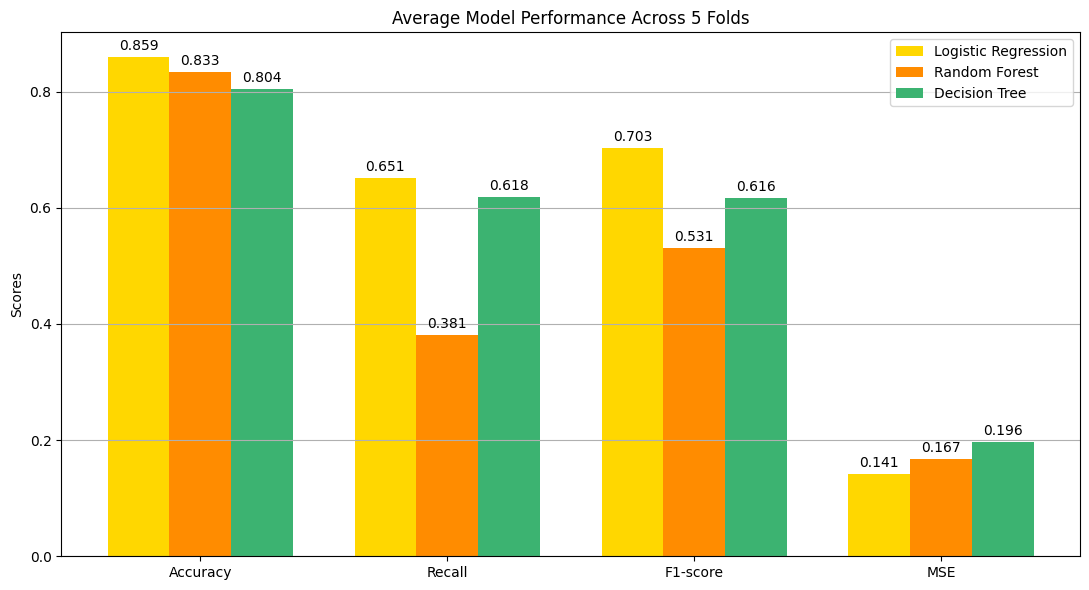

In [12]:
# Labels and metric names
labels = ['Accuracy', 'Recall', 'F1-score', 'MSE']
x = np.arange(len(labels))
width = 0.25

# Final scores (from your screenshot)
logistic_scores = [0.859, 0.651, 0.703, 0.141]
rf_scores       = [0.833, 0.381, 0.531, 0.167]
dt_scores       = [0.804, 0.618, 0.616, 0.196]

# Create bar chart
fig, ax = plt.subplots(figsize=(11, 6))
bars1 = ax.bar(x - width, logistic_scores, width, label='Logistic Regression', color='gold')
bars2 = ax.bar(x, rf_scores, width, label='Random Forest', color='darkorange')
bars3 = ax.bar(x + width, dt_scores, width, label='Decision Tree', color='mediumseagreen')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Average Model Performance Across 5 Folds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y')

# Add value labels
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

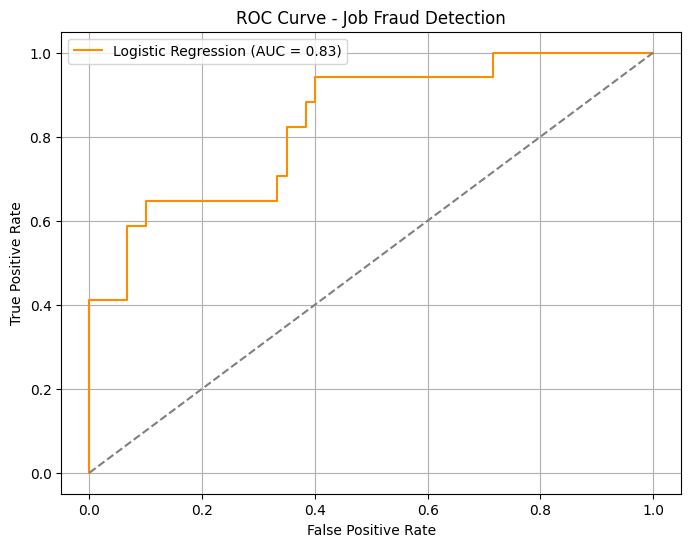

In [13]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get predicted probabilities (not labels)
y_probs = model.predict_proba(X_test_features)[:, 1]

# 2. Calculate FPR, TPR for various thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)

# 3. Calculate AUC (Area Under Curve)
auc_score = roc_auc_score(Y_test, y_probs)

# 4. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Job Fraud Detection')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#KNN - classifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_features, Y_train)
knn_predictions = knn_model.predict(X_test_features)

# Evaluate
print("Accuracy:", accuracy_score(Y_test, knn_predictions))



Accuracy: 0.8051948051948052


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load your data
df = pd.read_csv("tech_jobs.csv")

# Filter only fraudulent jobs
fraudulent_jobs = df[df['is_scam'] == 1]

# Clean text data - use 'requirement' only
text_data = fraudulent_jobs['clean_text'].fillna('')

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)  # You can change max_features as needed
X_tfidf = vectorizer.fit_transform(text_data)

# Get feature names and their corresponding TF-IDF scores (mean across docs)
feature_names = vectorizer.get_feature_names_out()
mean_scores = X_tfidf.mean(axis=0).A1  # Convert sparse matrix to flat array

# Create DataFrame to view top important words
tfidf_df = pd.DataFrame({'word': feature_names, 'score': mean_scores})
top_words = tfidf_df.sort_values(by='score', ascending=False).reset_index(drop=True)

top_words.head(20)


,word,score
0,work,0.161637
1,earn,0.114066
2,experience,0.108282
3,time,0.101985
4,pay,0.100578
5,look,0.098540
6,need,0.096994
7,team,0.088486
8,help,0.086846
9,hour,0.081477


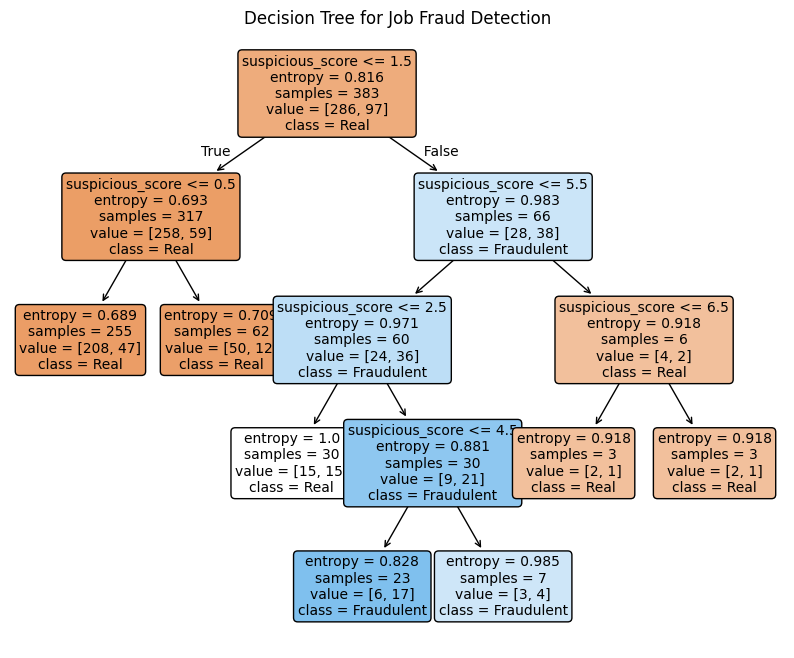

In [18]:
#decision tree

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("tech_jobs.csv")
df.head()

# Select features and target
x = df[['suspicious_score']].copy()
y = df['is_scam']

# Encode categorical features
for col in x.columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Train the decision tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(x, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    clf,
    feature_names=x.columns,
    class_names=['Real', 'Fraudulent'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Job Fraud Detection")
plt.show()


In [21]:
import joblib

# Save each model
joblib.dump(log_model, "logistic_model.pkl")
joblib.dump(rf_model, "random_forest.pkl")
joblib.dump(dt_model, "decision_tree.pkl")

# Save the TF-IDF vectorizer (use whatever name you trained it with)
joblib.dump(vectorizer2, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']